In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/wjssm/Desktop/kaggle/Elo_Merchant_Category_Recommendation/data/'

train = pd.read_csv(path + 'train.csv') #key : card_id
test = pd.read_csv(path + 'test.csv') #key : card_id
#history = pd.read_csv(path+'historical_transactions.csv') #key : card_id, merchant_id
#new_history = pd.read_csv(path+'new_merchant_transactions.csv') #key : card_id, merchant_id
merchant = pd.read_csv(path+'merchants.csv') #key : merchant_id

In [3]:
#history = pd.read_pickle(path + 'sorted_history.pkl')
history.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
19095896,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
19095775,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
19095845,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
19095866,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
19095808,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


In [210]:
train = pd.read_csv(path + 'data_new_train_v1.csv')
test = pd.read_csv(path + 'data_new_test_v1.csv')

train['year'] = pd.DatetimeIndex(train['first_active_month']).year
train['month'] = pd.DatetimeIndex(train['first_active_month']).month

test['year'] = pd.DatetimeIndex(test['first_active_month']).year
test['month'] = pd.DatetimeIndex(test['first_active_month']).month

In [195]:
#test data에서의 NA어떻게 할지...
test.loc[test.first_active_month.isnull(),:]

,card_id,first_active_month,feature_1,feature_2,feature_3,history_month_nunique,history_hour_nunique,history_weekofyear_nunique,history_dayofweek_nunique,history_year_nunique,...,history_month_lag_month_lag_cnt_-9,history_month_lag_month_lag_cnt_0,history_category_2_category_2_cnt_1.0,history_category_2_category_2_cnt_2.0,history_category_2_category_2_cnt_3.0,history_category_2_category_2_cnt_4.0,history_category_2_category_2_cnt_5.0,history_category_2_category_2_cnt_NULL,year,month
11578,C_ID_c27b4f80f7,NaN,5,2,1,11,10,28,7,2,...,1,6,1,0,0,0,0,54,NaN,NaN


In [211]:
test.loc[test.card_id == 'C_ID_c27b4f80f7', 'year'] = 2017 #최빈값
test.loc[test.card_id == 'C_ID_c27b4f80f7', 'month'] = 3 #가장 오래된 거래가 2017.03

In [7]:
history.loc[history.card_id == 'C_ID_c27b4f80f7', :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
25672893,N,C_ID_c27b4f80f7,-1,Y,10,C,511,M_ID_b9dcf28cb9,-11,-0.056289,2017-03-09 01:34:22,NaN,-1,7
25672920,N,C_ID_c27b4f80f7,-1,Y,10,C,511,M_ID_b9dcf28cb9,-11,-0.407564,2017-03-09 01:46:07,NaN,-1,7
25672896,N,C_ID_c27b4f80f7,-1,Y,10,C,511,M_ID_b9dcf28cb9,-11,-0.056289,2017-03-10 20:41:16,NaN,-1,7
25672907,N,C_ID_c27b4f80f7,-1,Y,10,C,511,M_ID_b9dcf28cb9,-11,-0.056289,2017-03-11 02:46:55,NaN,-1,7
25672941,N,C_ID_c27b4f80f7,-1,Y,10,C,511,M_ID_b9dcf28cb9,-11,-0.407564,2017-03-11 02:57:50,NaN,-1,7
25672938,Y,C_ID_c27b4f80f7,-1,Y,1,B,511,M_ID_b9dcf28cb9,-11,-0.745405,2017-03-25 00:36:49,NaN,-1,7
25672934,Y,C_ID_c27b4f80f7,-1,Y,1,B,111,M_ID_21f1585175,-9,-0.745405,2017-05-12 23:15:44,NaN,-1,36
25672899,N,C_ID_c27b4f80f7,-1,Y,6,C,111,M_ID_21f1585175,-8,-0.351109,2017-06-12 11:35:10,NaN,-1,36
25672906,N,C_ID_c27b4f80f7,-1,Y,6,C,111,M_ID_21f1585175,-8,-0.351109,2017-06-15 11:47:24,NaN,-1,36
25672923,N,C_ID_c27b4f80f7,-1,Y,1,B,111,M_ID_21f1585175,-8,-0.680941,2017-06-15 12:29:25,NaN,-1,36


In [19]:
#merged : history + new_history -> sorted
transaction = pd.concat([history, new_history]).sort_values(['card_id','purchase_date'])
transaction.index = list(range(31075392))
#transaction.to_pickle('merged_transaction')
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
19095896,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
19095775,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
19095845,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
19095866,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
19095808,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


### 1. authorized_flag

# authorized/not_authorized :  카드 아이디별 승인/비승인 건수

In [197]:
card_authorized = transaction.groupby(['card_id','authorized_flag'])['authorized_flag'].count()
card_authorized = pd.DataFrame(card_authorized).unstack('authorized_flag')
card_authorized.head()

authorized_flag       
authorized_flag               N      Y
card_id                               
C_ID_00007093c1            35.0  116.0
C_ID_0001238066             3.0  146.0
C_ID_0001506ef0             4.0   64.0
C_ID_0001793786            27.0  220.0
C_ID_000183fdda             7.0  148.0

In [199]:
authorize = pd.concat([pd.Series(card_authorized[("authorized_flag", "Y")].values), pd.Series(card_authorized[("authorized_flag", "N")].values) ], axis = 1)
authorize.index = transaction.card_id.unique()
authorize.columns = ['authorized','not_authorized']
authorize.head()

,authorized,not_authorized
C_ID_00007093c1,116.0,35.0
C_ID_0001238066,146.0,3.0
C_ID_0001506ef0,64.0,4.0
C_ID_0001793786,220.0,27.0
C_ID_000183fdda,148.0,7.0


In [200]:
authorize.fillna(0,inplace=True)

In [201]:
authorize['authorized_rate'] = authorize['not_authorized'] / authorize['authorized']
authorize.head()

,authorized,not_authorized,authorized_rate
C_ID_00007093c1,116.0,35.0,0.301724
C_ID_0001238066,146.0,3.0,0.020548
C_ID_0001506ef0,64.0,4.0,0.062500
C_ID_0001793786,220.0,27.0,0.122727
C_ID_000183fdda,148.0,7.0,0.047297


In [113]:
print('전체 비승인/승인 비율 : ', sum(transaction.authorized_flag == 'N') / sum(transaction.authorized_flag == 'Y') )

전체 승인/비승인 비율 :  0.0881317470539314


### history - installments outlier

In [94]:
transaction['installments'].value_counts()

 0      16333991
 1      12513700
 2        721145
 3        582957
-1        234081
 4        194340
 6        143023
 10       127726
 5        125386
 12        57914
 8         22029
 7         11769
 9          6250
 11          891
 999         190
Name: installments, dtype: int64

### 2. installments : 할부

#### 999

In [95]:
#category3가 B == installments 1
print('category_3 = B인 개수 : ', transaction.loc[transaction.category_3 == 'B',:].shape[0])
print('installments = 1인 개수 : ', transaction.loc[transaction.installments == 1,:].shape[0])

category_3 = B인 개수 :  12513700
installments = 1인 개수 :  12513700


In [96]:
transaction.loc[transaction.installments != 999, 'category_3'].value_counts()

A    16333991
B    12513700
C     1993430
Name: category_3, dtype: int64

In [97]:
#installments 999 -> category3 다 C
transaction.loc[transaction.installments == 999, 'category_3'].value_counts()

C    190
Name: category_3, dtype: int64

In [98]:
##역은 성립 x
transaction.loc[transaction.category_3 == 'C', 'installments'].value_counts()

2      721145
3      582957
4      194340
6      143023
10     127726
5      125386
12      57914
8       22029
7       11769
9        6250
11        891
999       190
Name: installments, dtype: int64

In [127]:
transaction.loc[transaction.installments == -1]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
229,Y,C_ID_0001238066,187,N,-1,NaN,367,M_ID_3f35ef9a50,-1,-0.605012,2018-01-06 12:14:16,1.0,15,16
235,Y,C_ID_0001238066,-1,N,-1,NaN,333,M_ID_40d7b120ab,-1,0.244842,2018-01-18 13:58:35,NaN,-1,10
240,Y,C_ID_0001238066,160,N,-1,NaN,451,M_ID_970d4d00da,-1,-0.161475,2018-01-23 11:44:30,5.0,21,7
279,Y,C_ID_0001238066,69,N,-1,NaN,87,M_ID_b34bebaf3c,1,-0.152008,2018-03-16 18:49:21,1.0,9,27
697,Y,C_ID_000183fdda,87,N,-1,NaN,369,M_ID_67894eed56,-2,-0.506634,2017-12-28 16:56:20,3.0,11,27
699,Y,C_ID_000183fdda,161,N,-1,NaN,68,M_ID_f4e377b35d,-2,-0.091752,2017-12-29 11:31:47,3.0,3,27
716,Y,C_ID_000183fdda,161,N,-1,NaN,68,M_ID_f4e377b35d,-1,-0.460833,2018-01-12 10:33:26,3.0,3,27
717,Y,C_ID_000183fdda,161,N,-1,NaN,422,M_ID_4b99ea1c74,-1,-0.536537,2018-01-12 12:18:39,3.0,3,27
769,Y,C_ID_000183fdda,161,N,-1,NaN,489,M_ID_3bf000781a,2,-0.107680,2018-04-30 14:59:53,3.0,3,16
878,Y,C_ID_0002709b5a,103,N,-1,NaN,60,M_ID_5bb84e5819,-4,-0.645779,2017-10-28 00:00:00,2.0,18,13


In [131]:
transaction.loc[(transaction.merchant_id == 'M_ID_40d7b120ab') & (transaction.card_id == 'C_ID_0001238066')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
235,Y,C_ID_0001238066,-1,N,-1,NaN,333,M_ID_40d7b120ab,-1,0.244842,2018-01-18 13:58:35,NaN,-1,10


In [119]:
#installments 999인 data
installments_999 = transaction.loc[transaction.installments == 999]
installments_999.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
338010,N,C_ID_02bd1c4210,322,N,999,C,369,M_ID_44d94f35bb,-12,4.963167,2017-02-04 17:03:01,3.0,11,27
632347,N,C_ID_05240c2353,289,N,999,C,60,M_ID_dc44de5cf9,-2,0.697140,2017-08-30 11:35:02,5.0,5,13
858170,N,C_ID_06fca19c8e,331,N,999,C,222,M_ID_629b908f04,-6,1.036739,2017-08-10 13:26:40,1.0,16,21
1128016,N,C_ID_094bb1b704,69,N,999,C,412,M_ID_dfc0be4604,-5,1.507069,2017-03-17 18:52:58,1.0,9,18
1195721,N,C_ID_09dcde8f3c,137,N,999,C,891,M_ID_d0d69f7b22,-8,1.431335,2017-05-20 13:34:50,3.0,19,29


In [126]:
installments_999.loc[installments_999.authorized_flag == 'Y', :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
3075047,Y,C_ID_1947a910eb,174,N,999,C,840,M_ID_fcb061b2bf,-2,2.709190,2017-12-17 22:36:08,1.0,9,20
5642431,Y,C_ID_2e39f9fd94,340,N,999,C,840,M_ID_00f803a717,-4,0.754241,2017-10-28 13:46:13,1.0,9,20
9404025,Y,C_ID_4d3dbbbb1f,159,N,999,C,840,M_ID_e243972510,-2,0.755743,2017-12-28 19:27:12,1.0,9,20
12566258,Y,C_ID_6715eccea8,174,N,999,C,840,M_ID_fcb061b2bf,-2,0.491983,2017-11-23 23:24:39,1.0,9,20
13934716,Y,C_ID_726ae3c2bc,174,N,999,C,840,M_ID_fcb061b2bf,2,1.032186,2017-12-23 23:57:41,1.0,9,20
15926438,Y,C_ID_82e68c6826,174,N,999,C,840,M_ID_fcb061b2bf,-5,1.806097,2017-09-21 16:37:51,1.0,9,20
16482622,Y,C_ID_875f80a30c,340,N,999,C,840,M_ID_995feeec61,-3,4.435736,2017-09-20 18:21:42,1.0,9,20
16958974,Y,C_ID_8b3e96516a,174,N,999,C,840,M_ID_fcb061b2bf,1,-0.027138,2017-04-24 20:04:23,1.0,9,20


In [125]:
installments_999.authorized_flag.value_counts()

N    182
Y      8
Name: authorized_flag, dtype: int64

In [120]:
installments_999.shape

(190, 14)

In [121]:
print('card_id unique 개수 : ', len(installments_999.card_id.unique()))
print('merchant_id unique 개수 : ', len(installments_999.merchant_id.unique()))

card_id unique 개수 :  180
merchant_id unique 개수 :  171


In [122]:
#승인이 여러번 N 된 경우 -> 같은 카드 아이디일 경우, 같은 merchant_id
installments_999.card_id.value_counts().head(5)

C_ID_1fa5e84ac3    6
C_ID_f8beeb608f    3
C_ID_2e39f9fd94    2
C_ID_76859ed625    2
C_ID_105ae2e0d1    2
Name: card_id, dtype: int64

In [123]:
#같은 날 비슷한 시간대에 일어남
installments_999.loc[installments_999.card_id == 'C_ID_1fa5e84ac3', :]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
3870739,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:07:18,NaN,-1,1
3870740,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:07:19,NaN,-1,1
3870741,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:58:12,NaN,-1,1
3870742,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:58:13,NaN,-1,1
3870743,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 12:50:38,NaN,-1,1
3870744,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 13:41:26,NaN,-1,1


In [110]:
#같은 날 
transaction.loc[(transaction.card_id == 'C_ID_1fa5e84ac3') & (transaction.merchant_id =='M_ID_3111c6df35')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
3870739,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:07:18,NaN,-1,1
3870740,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:07:19,NaN,-1,1
3870741,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:58:12,NaN,-1,1
3870742,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 11:58:13,NaN,-1,1
3870743,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 12:50:38,NaN,-1,1
3870744,N,C_ID_1fa5e84ac3,-1,Y,999,C,690,M_ID_3111c6df35,-3,1.619738,2017-11-27 13:41:26,NaN,-1,1


In [70]:
installments_999.loc[installments_999.card_id == 'C_ID_f8beeb608f', :]

,card_id,merchant_id
27441288,C_ID_f8beeb608f,M_ID_0bef30db30
27441292,C_ID_f8beeb608f,M_ID_0bef30db30
27441309,C_ID_f8beeb608f,M_ID_0bef30db30


In [133]:
#같은 날 여러번 시도 끝에 승인
transaction.loc[(transaction.card_id == 'C_ID_f8beeb608f') & (transaction.merchant_id =='M_ID_0bef30db30')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
30175184,N,C_ID_f8beeb608f,158,N,7,C,246,M_ID_0bef30db30,0,15.556857,2018-02-09 13:43:22,1.0,15,7
30175185,N,C_ID_f8beeb608f,158,N,6,C,246,M_ID_0bef30db30,0,13.227748,2018-02-09 13:44:23,1.0,15,7
30175186,N,C_ID_f8beeb608f,158,N,999,C,246,M_ID_0bef30db30,0,45.835279,2018-02-09 14:02:02,1.0,15,7
30175187,N,C_ID_f8beeb608f,158,N,999,C,246,M_ID_0bef30db30,0,45.835279,2018-02-09 14:03:28,1.0,15,7
30175188,N,C_ID_f8beeb608f,158,N,999,C,246,M_ID_0bef30db30,0,45.835279,2018-02-09 14:08:48,1.0,15,7
30175189,Y,C_ID_f8beeb608f,158,N,10,C,246,M_ID_0bef30db30,0,22.544185,2018-02-09 14:10:28,1.0,15,7


In [71]:
installments_999.loc[installments_999.card_id == 'C_ID_2e39f9fd94', :]

,card_id,merchant_id
13456410,C_ID_2e39f9fd94,M_ID_00f803a717
13456426,C_ID_2e39f9fd94,M_ID_00f803a717


In [135]:
#같은 날 승인 후, 다시 ?
transaction.loc[(transaction.card_id == 'C_ID_2e39f9fd94') & (transaction.merchant_id =='M_ID_00f803a717')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
5642431,Y,C_ID_2e39f9fd94,340,N,999,C,840,M_ID_00f803a717,-4,0.754241,2017-10-28 13:46:13,1.0,9,20
5642432,N,C_ID_2e39f9fd94,340,N,999,C,840,M_ID_00f803a717,-4,0.754241,2017-10-28 17:54:47,1.0,9,20


In [72]:
installments_999.loc[installments_999.card_id == 'C_ID_105ae2e0d1', :]

,card_id,merchant_id
4024235,C_ID_105ae2e0d1,M_ID_43d0f0f4dc
4024281,C_ID_105ae2e0d1,M_ID_43d0f0f4dc


In [136]:
#같은 날 여러번 시도 끝에 승인받지 못 하고 다른 날 승인
transaction.loc[(transaction.card_id == 'C_ID_105ae2e0d1') & (transaction.merchant_id =='M_ID_43d0f0f4dc')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1992686,N,C_ID_105ae2e0d1,125,N,999,C,792,M_ID_43d0f0f4dc,0,3.492071,2018-02-07 16:59:36,1.0,16,9
1992687,N,C_ID_105ae2e0d1,125,N,999,C,792,M_ID_43d0f0f4dc,0,3.492071,2018-02-07 17:00:33,1.0,16,9
1992692,Y,C_ID_105ae2e0d1,125,N,12,C,792,M_ID_43d0f0f4dc,0,3.492071,2018-02-09 16:51:48,1.0,16,9


In [73]:
installments_999.loc[installments_999.card_id == 'C_ID_76859ed625', :]

,card_id,merchant_id
8010607,C_ID_76859ed625,M_ID_c9714065ed
8010833,C_ID_76859ed625,M_ID_c9714065ed


In [137]:
#같은 날 여러번 시도 끝에 승인
transaction.loc[(transaction.card_id == 'C_ID_76859ed625') & (transaction.merchant_id =='M_ID_c9714065ed')]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
14434730,N,C_ID_76859ed625,69,N,999,C,34,M_ID_c9714065ed,-8,1.657334,2017-06-03 10:35:51,1.0,9,38
14434731,N,C_ID_76859ed625,69,N,999,C,34,M_ID_c9714065ed,-8,1.657334,2017-06-03 10:36:59,1.0,9,38
14434732,Y,C_ID_76859ed625,69,N,12,C,34,M_ID_c9714065ed,-8,1.657334,2017-06-03 10:38:12,1.0,9,38


# merchant_visit : 같은 가게를 다른 날 몇 번 방문할까


In [146]:
#구매 날짜만 only
transaction['purchase_t'] = pd.DatetimeIndex(transaction['purchase_date']).date

In [152]:
merchant_visit = transaction.groupby(['card_id', 'merchant_id'])['purchase_t'].count()
merchant_visit.head()

card_id          merchant_id    
C_ID_00007093c1  M_ID_00a6ca8a8a    1
                 M_ID_0379adb435    4
                 M_ID_06a8d84366    1
                 M_ID_08f01305af    1
                 M_ID_0dabc5a70c    2
Name: purchase_t, dtype: int64

In [164]:
#card_id 별 같은 가게를 다른 날 몇 번 방문하나
merchant_visit = pd.DataFrame(merchant_visit)
merchant_visit.head()

purchase_t
card_id         merchant_id                
C_ID_00007093c1 M_ID_00a6ca8a8a           1
                M_ID_0379adb435           4
                M_ID_06a8d84366           1
                M_ID_08f01305af           1
                M_ID_0dabc5a70c           2

In [176]:
merchant_visit = merchant_visit.groupby(['card_id']).agg(["sum", "mean", "min", "max",'nunique','size'])
merchant_visit.head()

purchase_t                                         
                       sum      mean       std min max nunique size
card_id                                                            
C_ID_00007093c1        151  4.870968  8.558590   1  42       9   31
C_ID_0001238066        148  1.644444  2.900256   1  24       7   90
C_ID_0001506ef0         67  2.310345  2.842326   1  13       6   29
C_ID_0001793786        247  1.646667  1.921747   1  17       8  150
C_ID_000183fdda        155  1.845238  1.904301   1  13       9   84

In [178]:
merchant_visit.columns = ['visit_sum','visit_mean','visit_min','visit_max','visit_nunique','visit_size']

In [179]:
merchant_visit.head()

,visit_sum,visit_mean,visit_std,visit_min,visit_max,visit_nunique,visit_size
card_id,,,,,,,
C_ID_00007093c1,151,4.870968,8.558590,1,42,9,31
C_ID_0001238066,148,1.644444,2.900256,1,24,7,90
C_ID_0001506ef0,67,2.310345,2.842326,1,13,6,29
C_ID_0001793786,247,1.646667,1.921747,1,17,8,150
C_ID_000183fdda,155,1.845238,1.904301,1,13,9,84


# merchant_try : 같은 가게에서 같은 날 몇 번 시도하는지

In [187]:
merchant_try = transaction.groupby(['card_id', 'merchant_id','purchase_t'])['purchase_t'].count()
merchant_try.head()

card_id          merchant_id      purchase_t
C_ID_00007093c1  M_ID_00a6ca8a8a  2018-04-09    1
                 M_ID_0379adb435  2017-06-07    1
                                  2017-07-06    1
                                  2017-08-08    1
                                  2017-09-25    1
Name: purchase_t, dtype: int64

In [188]:
merchant_try = pd.DataFrame(merchant_try)
merchant_try.head(10)

purchase_t
card_id         merchant_id     purchase_t            
C_ID_00007093c1 M_ID_00a6ca8a8a 2018-04-09           1
                M_ID_0379adb435 2017-06-07           1
                                2017-07-06           1
                                2017-08-08           1
                                2017-09-25           1
                M_ID_06a8d84366 2018-02-07           1
                M_ID_08f01305af 2018-04-03           1
                M_ID_0dabc5a70c 2017-06-07           1
                                2017-09-28           1
                M_ID_109e9d2b1d 2017-05-16           1

In [189]:
merchant_try = merchant_try.groupby(['card_id']).agg([ "mean", "std", "min", "max",'nunique','size'])
merchant_try.head()

purchase_t                               
                      mean       std min max nunique size
card_id                                                  
C_ID_00007093c1   1.258333  0.654600   1   4       4  120
C_ID_0001238066   1.080292  0.322180   1   3       3  137
C_ID_0001506ef0   1.155172  0.365231   1   2       2   58
C_ID_0001793786   1.122727  0.446633   1   5       5  220
C_ID_000183fdda   1.107143  0.410236   1   3       3  140

In [190]:
merchant_try.columns = ['try_mean','try_std','try_min','try_max','try_nunique','try_size']

In [191]:
merchant_try.head()

,try_mean,try_std,try_min,try_max,try_nunique,try_size
card_id,,,,,,
C_ID_00007093c1,1.258333,0.654600,1,4,4,120
C_ID_0001238066,1.080292,0.322180,1,3,3,137
C_ID_0001506ef0,1.155172,0.365231,1,2,2,58
C_ID_0001793786,1.122727,0.446633,1,5,5,220
C_ID_000183fdda,1.107143,0.410236,1,3,3,140


# 모델 확인

In [202]:
authorize.head()

,authorized,not_authorized,authorized_rate
C_ID_00007093c1,116.0,35.0,0.301724
C_ID_0001238066,146.0,3.0,0.020548
C_ID_0001506ef0,64.0,4.0,0.062500
C_ID_0001793786,220.0,27.0,0.122727
C_ID_000183fdda,148.0,7.0,0.047297


In [215]:
authorize.index.name = 'card_id'
authorize.head()

,authorized,not_authorized,authorized_rate
card_id,,,
C_ID_00007093c1,116.0,35.0,0.301724
C_ID_0001238066,146.0,3.0,0.020548
C_ID_0001506ef0,64.0,4.0,0.062500
C_ID_0001793786,220.0,27.0,0.122727
C_ID_000183fdda,148.0,7.0,0.047297


In [203]:
merchant_visit.head()

,visit_sum,visit_mean,visit_std,visit_min,visit_max,visit_nunique,visit_size
card_id,,,,,,,
C_ID_00007093c1,151,4.870968,8.558590,1,42,9,31
C_ID_0001238066,148,1.644444,2.900256,1,24,7,90
C_ID_0001506ef0,67,2.310345,2.842326,1,13,6,29
C_ID_0001793786,247,1.646667,1.921747,1,17,8,150
C_ID_000183fdda,155,1.845238,1.904301,1,13,9,84


In [204]:
merchant_try.head()

,try_mean,try_std,try_min,try_max,try_nunique,try_size
card_id,,,,,,
C_ID_00007093c1,1.258333,0.654600,1,4,4,120
C_ID_0001238066,1.080292,0.322180,1,3,3,137
C_ID_0001506ef0,1.155172,0.365231,1,2,2,58
C_ID_0001793786,1.122727,0.446633,1,5,5,220
C_ID_000183fdda,1.107143,0.410236,1,3,3,140


In [212]:
train.drop(['first_active_month'], axis = 1, inplace=True)
test.drop(['first_active_month'], axis = 1, inplace=True)

In [213]:
train.set_index('card_id', inplace=True)
test.set_index('card_id', inplace=True)

In [222]:
train = pd.merge(train,authorize, on = 'card_id')
train = pd.merge(train,merchant_visit, on = 'card_id')
train = pd.merge(train,merchant_try, on = 'card_id')
train.head()

,feature_1,feature_2,feature_3,target,history_month_nunique,history_hour_nunique,history_weekofyear_nunique,history_dayofweek_nunique,history_year_nunique,history_subsector_id_nunique,...,visit_min,visit_max,visit_nunique,visit_size,try_mean,try_std,try_min,try_max,try_nunique,try_size
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,5,2,1,-0.820283,9,23,35,7,2,21,...,1,32,12,117,1.049242,0.216785,1,2,2,264
C_ID_3d0044924f,4,1,0,0.392913,12,24,50,7,2,24,...,1,27,12,148,1.059524,0.249235,1,3,3,336
C_ID_d639edf6cd,2,2,0,0.688056,10,14,22,7,2,7,...,1,28,4,14,1.157895,0.436591,1,3,3,38
C_ID_186d6a6901,4,3,0,0.142495,6,16,20,7,2,13,...,1,9,6,57,1.024390,0.155207,1,2,2,82
C_ID_cdbd2c0db2,1,3,0,-0.159749,4,22,17,7,2,17,...,1,28,7,102,1.070064,0.322543,1,3,3,157


In [223]:
test = pd.merge(test,authorize, on = 'card_id')
test = pd.merge(test,merchant_visit, on = 'card_id')
test = pd.merge(test,merchant_try, on = 'card_id')
test.head()

,feature_1,feature_2,feature_3,history_month_nunique,history_hour_nunique,history_weekofyear_nunique,history_dayofweek_nunique,history_year_nunique,history_subsector_id_nunique,history_merchant_id_nunique,...,visit_min,visit_max,visit_nunique,visit_size,try_mean,try_std,try_min,try_max,try_nunique,try_size
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_0ab67a22ab,3,3,1,9,17,24,7,1,12,24,...,1,23,6,27,1.392157,0.801958,1,5,4,51
C_ID_130fd0cbdd,2,3,0,5,18,20,7,2,12,27,...,1,8,7,36,1.011628,0.107833,1,2,2,86
C_ID_b709037bc5,5,1,1,6,7,7,4,2,6,9,...,1,3,3,11,1.153846,0.375534,1,2,2,13
C_ID_d27d835a9f,2,1,0,3,9,6,7,2,11,23,...,1,3,3,33,1.000000,0.000000,1,1,1,36
C_ID_2b5e3df5c2,5,1,1,12,21,34,7,2,15,47,...,1,26,7,53,1.247312,0.732119,1,6,5,93


In [224]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [235]:
x_train = train.drop(['target'], axis=1)
y_train = train['target']

In [236]:
# Statsmodel.Api Method
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

In [238]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     77.74
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:13:18   Log-Likelihood:            -5.5559e+05
No. Observations:              201917   AIC:                         1.111e+06
Df Residuals:                  201834   BIC:                         1.112e+06
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [240]:
y_predict = result1.predict(x_train)
predict_dt = pd.DataFrame({'predict':list(y_predict.values),'actual':list(y_train.values)})

In [241]:
predict_dt.head()

,predict,actual
0,-0.409626,-0.820283
1,-0.254669,0.392913
2,0.087783,0.688056
3,-0.077270,0.142495
4,-1.285512,-0.159749


In [245]:
elastic_predict = result1.predict(test)
elastic_pred = pd.DataFrame(elastic_predict, index=test.index, columns=['target'])

In [253]:
#3.905
elastic_pred.to_csv('190206_elastic.csv')

In [246]:
from lightgbm import LGBMRegressor

In [247]:
lgb = LGBMRegressor()

In [250]:
result2 = lgb.fit(x_train, y_train)
lgb_pred = result2.predict(test)

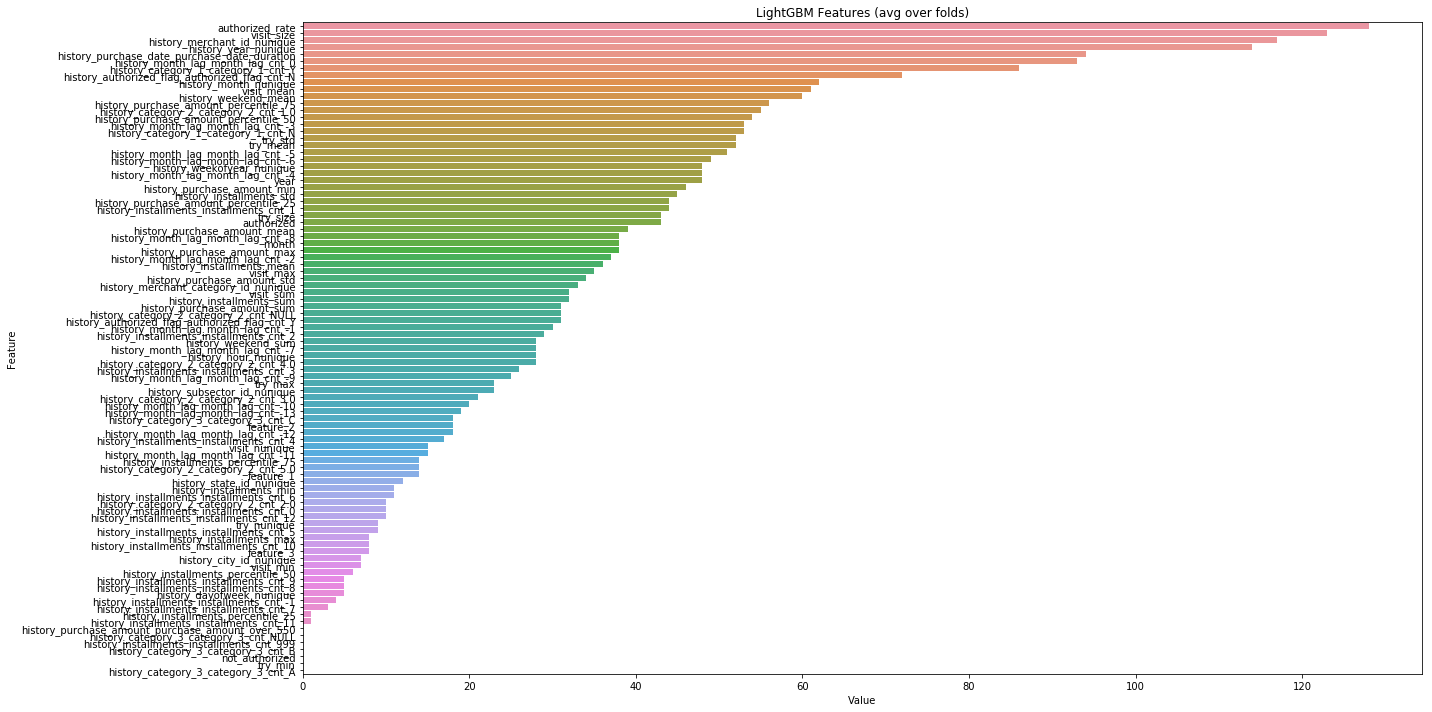

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')

In [251]:
lgb_pred = pd.DataFrame(lgb_pred, index=test.index, columns=['target'])

In [252]:
#3.905
lgb_pred.to_csv('190206_lgb.csv')

In [ ]:
lgb_pred = pd.DataFrame(lgb_pred, index=test.index, columns=['target'])

# category_2

In [93]:
category2_null = history.loc[history.category_2.isnull(), :].sort_values(['card_id', 'merchant_id','purchase_date'], ascending=True)

In [95]:
category2_null.shape

(2652864, 14)

In [96]:
print('category2_null 중에서 unique card_id : ', len(category2_null.card_id.unique()) )
print('category2_null 중에서 unique merchant_id : ', len(category2_null.merchant_id.unique()) )

category2_null 중에서 unique card_id :  167432
category2_null 중에서 unique merchant_id :  15954
